# IMPLEMENTATION OF LOGISTIC REGRESSION

# Neeraj Joshi
# Roll No - 120
# Aiml Batch 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y.csv")

X_test = pd.read_csv("test_X.csv")
Y_test = pd.read_csv("test_Y.csv")

In [3]:
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [4]:
X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

In [5]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1


# Shape of the dataset

In [6]:
print('Shape of X_train : ' , X_train.shape)
print('Shape of Y_train : ' , Y_train.shape)
print('Shape of X_test : ' , X_test.shape)
print('Shape of Y_test : ' , Y_test.shape)

Shape of X_train :  (891, 7)
Shape of Y_train :  (891, 1)
Shape of X_test :  (418, 7)
Shape of Y_test :  (418, 1)


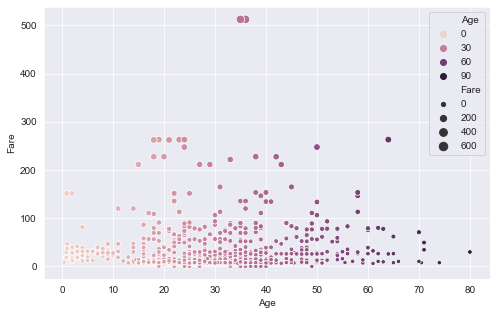

In [7]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.scatterplot(x = 'Age' , y = 'Fare' , data = X_train , hue = 'Age' , size = 'Fare')
plt.show()

(array([ 40.,  14.,  15.,  31., 100., 122., 129., 111., 113.,  66.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

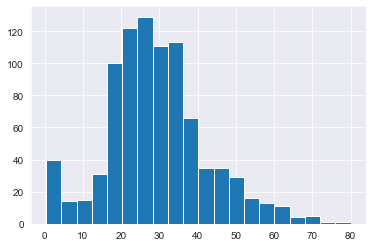

In [8]:
plt.hist(X_train['Age'] , bins = 20)

## Converting the date to array form

In [9]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [10]:
X_train

array([[ 3.    ,  0.    , 22.    , ...,  0.    ,  7.25  ,  1.    ],
       [ 1.    ,  1.    , 38.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    ,  1.    , 26.    , ...,  0.    ,  7.925 ,  1.    ],
       ...,
       [ 3.    ,  1.    , 20.    , ...,  2.    , 23.45  ,  1.    ],
       [ 1.    ,  0.    , 26.    , ...,  0.    , 30.    ,  0.    ],
       [ 3.    ,  0.    , 32.    , ...,  0.    ,  7.75  ,  2.    ]])

# Training using Gradient Descent

### Getting the required values

In [11]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [12]:
X_train

array([[ 3.    ,  1.    ,  3.    , ...,  3.    ,  1.    ,  3.    ],
       [ 0.    ,  1.    ,  1.    , ...,  1.    ,  0.    ,  0.    ],
       [22.    , 38.    , 26.    , ..., 20.    , 26.    , 32.    ],
       ...,
       [ 0.    ,  0.    ,  0.    , ...,  2.    ,  0.    ,  0.    ],
       [ 7.25  , 71.2833,  7.925 , ..., 23.45  , 30.    ,  7.75  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  2.    ]])

In [20]:
X_train.shape

(7, 891)

## Model

In [14]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [25]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum((Y * np.log(A)) + ((1-Y) * np.log(1-A)))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB

        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [26]:
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  10000 iteration is :  0.49652777693895306
cost after  20000 iteration is :  0.46674868550665993
cost after  30000 iteration is :  0.45687787762434423
cost after  40000 iteration is :  0.45288994293089646
cost after  50000 iteration is :  0.45093260252226425
cost after  60000 iteration is :  0.4497708749009468
cost after  70000 iteration is :  0.4489640829216279
cost after  80000 iteration is :  0.4483412696612483
cost after  90000 iteration is :  0.4478304524693579


## Graph for cost vs iteration

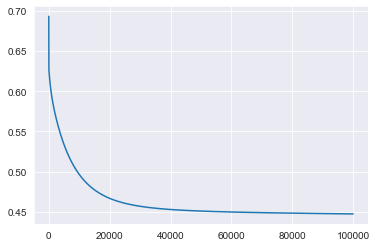

In [17]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

## Accuracy

In [18]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [19]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  91.39 %


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


###### We got 91.39% accuracy on the test dataset